# CMU 95-865 - Unstructured Data Analytics Fall 2021 Quiz 1

This is an 80 minute exam. We will only grade what is submitted via Canvas.

You must fill in your name and your Andrew ID for this quiz to be graded. Moreover, filling out your name and Andrew ID below will serve as your agreement with us, the course staff, that you did not collaborate with anyone on this exam and that what you submit is truly your own individual work and not that of anyone else. Violations found will result in severe penalties.

Your name: solutions

Your Andrew ID: n/a

**Warning: If you leave the above blank, your quiz will not be graded.**

**Important:** There are 3 problems that can be done in any order. The very first part of Problem 1 and most of Problem 3 involve coding.

## Problem 1: Drug Consumption, Revisited (1 very brief coding part, and 3 non-coding parts) [20 points]

Remember how in the clustering lectures, we analyzed the [UCI drug consumption dataset](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29)? We now revisit that dataset, except looking only at the features that correspond to what drugs people took. We specifically want to better understand patterns in the usage of different pairs of drugs. For instance, people who use one drug (such as amphetamines) might be more likely to use another drug (such as cannabis).

There are a total of 18 real drugs that the study tracked, and also 1 fake drug (called Semeron) that the study included (basically it was added as a sanity check to see if some people just over-claimed what drugs they took, even claiming to take a fictituous drug). Thus, there are 19 drugs that we keep track of. For each respondent in the dataset, we keep track of whether they took each of the drugs or not (so that each feature is binary). Note that in the original dataset, they actually also keep track of when was the last time each respondent took each drug, if they claimed to have taken the drug--we will *not* use this information and will only be looking at whether they ever took the drug or not.

**(a)  [5 points] Calculating phi-squared values.** As a warm-up to the later questions, please compute the phi-squared values for each of the following two co-occurrence tables (these are based on the real data!):

```
+---------------+-------------------+------------------+
|               |   chocolate : yes |   chocolate : no |
+===============+===================+==================+
| alcohol : yes |              1822 |               29 |
+---------------+-------------------+------------------+
| alcohol : no  |                31 |                3 |
+---------------+-------------------+------------------+

+---------------+----------------------------------+---------------------------------+
|               |   volatile substance abuse : yes |   volatile substance abuse : no |
+===============+==================================+=================================+
| ecstasy : yes |                              317 |                             547 |
+---------------+----------------------------------+---------------------------------+
| ecstasy : no  |                              113 |                             908 |
+---------------+----------------------------------+---------------------------------+
```

Note that the numbers in the table correspond to the number of participants who fall into that particular box (e.g., 29 respondents have had alcohol but never had chocolate in their lives).

**Phi-squared value for alcohol & chocolate**: 0.005589221098449516

In [3]:
import numpy as np
co_occur_table = np.array([[1822, 29], [31, 3]])
joint_prob_table = co_occur_table / co_occur_table.sum()
joint_prob_table_indep = np.outer(joint_prob_table.sum(axis=1), joint_prob_table.sum(axis=0))
phi_squared = ((joint_prob_table - joint_prob_table_indep)**2 / joint_prob_table_indep).sum()
print(phi_squared)

0.005589221098449516


**Phi-squared value for ectasy & volatile substance abuse (also please show your work):** 0.09256398054008015

In [4]:
co_occur_table = np.array([[317, 547], [113, 908]])
joint_prob_table = co_occur_table / co_occur_table.sum()
joint_prob_table_indep = np.outer(joint_prob_table.sum(axis=1), joint_prob_table.sum(axis=0))
phi_squared = ((joint_prob_table - joint_prob_table_indep)**2 / joint_prob_table_indep).sum()
print(phi_squared)

0.09256398054008015


---

Of course, there aren't just 2 tables. Since there are 19 drugs, there are a total of $\frac{19\times18}{2} = 171$ co-occurrence tables (each of these are 2-by-2) to consider! We aren't going to ask you to compute the phi-squared values of all of these by hand.

**(b) [5 points] Max phi-squared value.** What is the maximum possible phi-squared value for 2-by-2 co-occurrence tables like the ones above (where each row and each column has a nonzero sum)?

**Your answer here (please be sure to include an explanation of how you got your answer):** min(2, 2) - 1 = 1

**(c) [5 points] Ranking pairs of drugs.** True or false: to rank the 171 drug pairs, we cannot use phi-squared or Chi-squared, and instead, we have to use Cramer's V.

**Your answer here (please indicate true or false, and regardless of which option you put, you must explain your answer to receive any credit):** False; in this case, we can in fact use phi-squared since all the tables are the same size, so the phi-squared values are all of the same scale (between 0 and 1). We can also use Chi-squared since the total number of co-occurrences is always the same across the different drug pairs (and is equal to the number of respondents: 1885).

**(d) [5 points] Interpreting rankings.** We went ahead and computed Cramer's V values for the 171 co-occurrence tables. Here are the pairs of drugs achieving the *lowest* 15 Cramer's V values:

```
Drug pair : Cramer's V value
('chocolate', 'volatile substance abuse') : 0.006853233165433918
('chocolate', 'methadone') : 0.007106981281108218
('caffeine', 'semeron') : 0.007869948391973384
('amyl nitrite', 'semeron') : 0.008160614641470642
('benzodiazepine', 'chocolate') : 0.008425059464745031
('chocolate', 'semeron') : 0.008579266066327003
('chocolate', 'mushrooms') : 0.010928706148444899
('alcohol', 'methadone') : 0.011402044438358674
('chocolate', 'heroin') : 0.014395893642663278
('chocolate', 'LSD') : 0.015354214527568324
('alcohol', 'volatile substance abuse') : 0.016680904709057108
('chocolate', 'nicotine') : 0.017000064195845693
('amphetamines', 'semeron') : 0.0186534878915554
('chocolate', 'cocaine') : 0.019638690380047206
('methadone', 'semeron') : 0.020289516922874635
```

Do these results make sense to you? How can you tell? (In other words, how would you interpret at least some of these pairs, and why does the interpretation make sense?) In answering these questions, please keep your answer to a maximum of four sentences.

**Your answer here (please be sure to explain your reasoning):** First off, Semeron is a fictituous drug, so we would expect that it shouldn't be used at all, so it is reassuring that we're seeing it show up a bunch for these drug pairs with low Cramer's V values (which suggests that these pairs of drugs are not all that interesting). Next, chocolate is showing up a bunch of times, which is largely unsurprising in that nearly everyone eats chocolate so chocolate is going to co-occur with everything, and in particular, chocolate usage is likely unrelated to usage of other drugs (put another way, chocolate assumption is probably close to being independent of nearly all the other drugs being tracked, so we would expect its Cramer's V value to be near 0).

## Problem 2: A Grab Bag of True/False Questions (No Coding) [20 points]

**(a) [5 points]** In a learned low-dimensional PCA space, distance is relative (so that, for instance, moving 1 unit of distance along the positive direction of the first principal component could mean moving different amounts of distance in the original high-dimensional feature space).

**Your answer here (please indicate true or false, and regardless of which option you put, you must explain your answer to receive any credit):** False. Distance is not relative in PCA space as PCA is linear. Moving one unit of distance in PCA space always corresponds to moving exactly the same amount in the high-dimensional space, where how much it moves depends on the PCA components weight matrix -- but very importantly it does *not* depend on where the point is in PCA space. This is in sharp contrast to nonlinear dimensionality reduction methods like t-SNE where we saw in class how distance can be relative.

**(b) [5 points]** For Isomap, when the number of nearest neighbors is set so high that we have an edge between every possible pair of points, then we are then just computing PCA.

**Your answer here (please indicate true or false, and regardless of which option you put, you must explain your answer to receive any credit):** False. It's MDS and not PCA. Note that while there are special cases of MDS that relate to versions of PCA, in general MDS and PCA are *not* mathematically equivalent.

**(c) [5 points]** k-means can only work well if the data are generated from a Gaussian mixture model where each cluster's shape is an equal-sized circle (or in higher dimensions, spheres/hyperspheres).

**Your answer here (please indicate true or false, and regardless of which option you put, you must explain your answer to receive any credit):** False. Importantly, the statement starts with "k-means can only work well if"; we just need to show an example where k-means works well and the data aren't coming from a GMM with equal-sized circle-shaped clusters. In lecture, there was an example of the umbrella and triangle shapes that are well-separated that k-means would be able to work well on too. This phenomenon holds more generally: if you have very well-separated true clusters, then even if they are of different sizes and shapes, k-means can still work well in identifying these clusters.

**(d) [5 points]** Before running PCA, we should always standardize the features (per feature, subtract the mean and divide by the standard deviation).

**Your answer here (please indicate true or false, and regardless of which option you put, you must explain your answer to receive any credit):** False. The statement says that we "should always standardize the features"; the keyword here "always" makes the statement false. Whether we should standardize features really depends on the dataset. For example, if you have a dataset where for a specific feature, the standard deviation is actually 0, then you would run into a divide by 0 problem. Separately, you could have a feature that is very unimportant, then by standardizing, you're changing every feature to have zero mean and unit variance, which might over-emphasize the unimportant feature.

## Problem 3: Tweets on Covid (Coding) [60 points]

In this problem, you will be working on a dataset of **tweets related to COVID-19**. These tweets have already been labeled with sentiment scores. We want to understand differences in what people talk about across different sentiments scores. Note that our goal here is explicitly *not* to solve any sort of prediction task (such as predicting sentiment scores). You could actually think of this problem as interpreting clusters of text documents, where someone has provided cluster labels for you (corresponding to sentiment scores).

We begin with some imports. **Important: Your code should not be importing any additional packages.**

In [17]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer
plt.style.use('seaborn')

Next, we load in tweets and sentiment scores:

In [5]:
with open('mystery_shoe_box.txt', 'r', encoding='utf-8') as f:
    tweets = []
    for line in f.readlines():
        tweets.append(line.strip())
    tweets = np.array(tweets)

with open('mystery_candy_corn.txt', 'r', encoding='utf-8') as f:
    sentiments = []
    for line in f.readlines():
        sentiments.append(line.strip())
    sentiments = np.array(sentiments)

assert len(tweets) == len(sentiments)

Note that the i-th tweet `tweets[i]` has sentiment score given by `sentiments[i]`. As an illustrative example, the below code prints out the first five tweets, prepended by their sentiment scores:

In [6]:
for sentiment, tweet in list(zip(sentiments, tweets))[:5]:
    print(sentiment, ':', tweet)
    print()

Extremely Negative : trending: new yorkers encounter empty supermarket shelves (pictured, wegmans in brooklyn), sold-out online grocers (foodkick, maxdelivery) as #coronavirus-fearing shoppers stock up https://t.co/gr76pcrlwh https://t.co/ivmkmsqdt1

Positive : when i couldn't find hand sanitizer at fred meyer, i turned to #amazon. but $114.97 for a 2 pack of purell??!!check out how #coronavirus concerns are driving up prices. https://t.co/ygbipbflmy

Extremely Positive : find out how you can protect yourself and loved ones from #coronavirus. ?

Negative : #panic buying hits #newyork city as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #bigapple 1st confirmed #coronavirus patient or a #bloomberg staged event? https://t.co/iasiregpc4 #qanon #qanon2018 #qanon2020 #election2020 #cdc https://t.co/29iszoewxu

Neutral : #toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #coronavirusupdate #covid_19 #9news #corvid19 #7newsmelb #du

**Important**: For this problem, parts (a), (b), (c), and (d) can be done in any order. If you get stuck, try attempting a different part.

**(a) [10 points total across subparts]** This is a warm-up problem, just to make sure you familiarize yourself with the data, and as a bit of basic Python coding review. 

**Subpart i [2.5 points].** How many tweets are tagged as "Extremely Positive"? In other words, how many "Extremely Positive" are there in the column of `Sentiment`? **Your Python code for this subpart should print out the answer to this question.**

In [7]:
print((sentiments == 'Extremely Positive').sum())

599

**Subpart ii [2.5 points].** How many tweets are tagged as "Extremely Negative"? In other words, how many "Extremely Negative" are there in the column of `Sentiment`? **Your Python code for this subpart should print out the answer to this question.**

In [13]:
print((sentiments == 'Extremely Negative').sum())

592


**Subpart iii [5 points].** If we map "Extremely Negative" to the number -2, "Negative" to -1, "Neutral" to 0, "Positive" to 1, and "Extremely Positive" to 2, then what is the average sentiment score for this tweet dataset? **Your Python code for this subpart should print out the answer to this question.**

In [12]:
numerical_list = []
for x in sentiments:
    if x == 'Extremely Negative':
        numerical_list.append(-2)
    elif x == 'Negative':
        numerical_list.append(-1)
    elif x == 'Neutral':
        numerical_list.append(0)
    elif x == 'Positive':
        numerical_list.append(1)
    else:
        numerical_list.append(2)
print(np.mean(numerical_list))

-0.021063717746182202


**(b) [15 points total across subparts]** In this problem, we will look at tweets with sentiment "Extremely Positive" and "Extremely Negative". Specifically, we aim to understand whether tweets with extremely positive sentiment are longer (or shorter) than those with extremely negative sentiment. For simplicity, we measure the length of a tweet `x` by just `len(x)` (i.e., we just count the number of characters).

**Subpart i [4 points].** What is the mean length of tweets with extremely positive sentiment?

In [14]:
tweet_lengths_extremely_positive = np.array([len(x) for x in tweets[sentiments == 'Extremely Positive']])
print(tweet_lengths_extremely_positive.mean())

236.90484140233724


What is the mean length of tweets with extremely negative sentiment?

In [15]:
tweet_lengths_extremely_negative = np.array([len(x) for x in tweets[sentiments == 'Extremely Negative']])
print(tweet_lengths_extremely_negative.mean())

230.84459459459458


**Subpart ii [6 points].** However, looking at the averages only tells an incomplete story. Let's look at the actual distributions of tweet length.

Plot a histogram showing the distribution of tweet lengths amont tweets with extremely positive sentiment. The x axis should correspond to tweet length with values sorted (smallest to largest tweet length) and the y-axis corresponds to raw counts.

<BarContainer object of 286 artists>

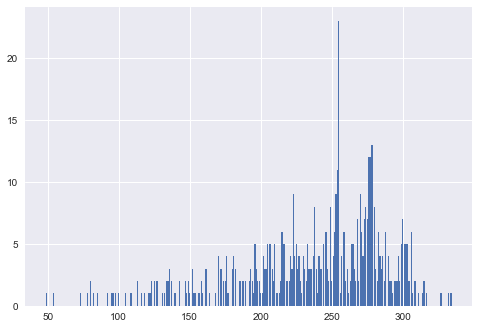

In [18]:
extremely_positive_distribution = Counter(tweet_lengths_extremely_positive)
x_values = list(range(tweet_lengths_extremely_positive.min(),
                      tweet_lengths_extremely_positive.max() + 1))
plt.bar(x_values, [extremely_positive_distribution[x] for x in x_values])

Now plot a histogram showing the distribution of tweet lengths amont tweets with extremely negative sentiment.

<BarContainer object of 268 artists>

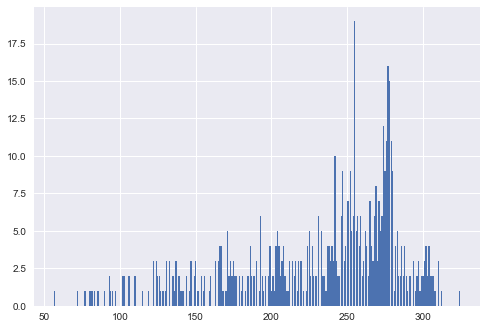

In [19]:
extremely_negative_distribution = Counter(tweet_lengths_extremely_negative)
x_values = list(range(tweet_lengths_extremely_negative.min(),
                      tweet_lengths_extremely_negative.max() + 1))
plt.bar(x_values, [extremely_negative_distribution[x] for x in x_values])

**Subpart iii [3 points].** Keep in mind that these tweets are just a small subsample of the entire population of tweets that exist.

Given your answers to the preceding parts, do you think that tweets with extremely positive sentiment actually are different than tweets with extremely negative sentiment? If so, how come? If not, why do you think they aren't all that different?

**Your answer here (please be sure to explain your reasoning):** The mean lengths aren't that different and the histograms don't look dramatically different either. Tweets are short, so there's only so much one can say. It's not surprising to see in both cases that there's a bit of a skew where many tweets are close to the maximum allowed by Twitter (280 characters).

**Subpart iv [2 points].** Twitter limits tweets to 280 characters. Very briefly (no more than 2 sentences max) explain why you might be seeing tweets that are longer than 280 characters in this dataset.

**Your answer here (please be sure to explain your reasoning):** One way to answer this question is by actually writing some code and printing out what some tweets over length 280 look like. What you'll find is that there are some systematic artifacts that result from how the dataset was collected (e.g., threads get prepended text, some punctuation has been turned into extra spaces, etc). Basically there are many cases where there's actually new text added (such as some tag information) that isn't just explained by, for instance, the text encoding used, or special characters in the post.

**(c) [15 points total across subparts]** Let's try to understand how extremely positive tweets differ from extremely negative tweets a different way: by looking at 
the top 20 most frequently occuring words for each of these two groups.

**Subpart i [10 points].** For this problem, we shall make use of scikit-learn's built-in English stop words list. It is defined in the following Python variable.

In [20]:
ENGLISH_STOP_WORDS  # DO NOT MODIFY THIS LINE OR THIS VARIABLE

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

Next, construct a histogram of words and their raw count frequencies in tweets with extremely positive sentiment. To do this, use the `Counter` object, and for each tweet `x`, please tokenize the tweet by just using `x.split()`. For your histogram, make sure that the words in `ENGLISH_STOP_WORDS` are not included in your histogram (or if they show up in your histogram, their raw count is set to 0). Display the top 20 words in the histogram, along with their raw counts.

**Warning:** do *not* use spaCy or `CountVectorizer`/`TfidfVectorizer`; if your solution uses either of these, you will not receive credit as we want to make sure you understand the basic mechanics of computing histograms.

In [24]:
word_histogram_extremely_positive = Counter()
for tweet in tweets[sentiments == 'Extremely Positive']:
    word_histogram_extremely_positive.update(tweet.split())
for stop_word in ENGLISH_STOP_WORDS:
    word_histogram_extremely_positive[stop_word] = 0
for k, v in word_histogram_extremely_positive.most_common()[:20]:
    print((k, v))

('#covid_19', 213)
('#coronavirus', 192)
('food', 144)
('store', 127)
('grocery', 124)
('&amp;', 119)
('stock', 116)
('online', 90)
('people', 89)
('like', 87)
('shopping', 87)
('help', 78)
('just', 63)
('need', 63)
('local', 58)
('covid-19', 57)
('hand', 55)
('?', 54)
('#covid19', 43)
('prices', 43)


Now repeat the above for the tweets with extremely negative sentiment (i.e., print out the top 20 words for tweets with extremely negative sentiment, excluding the stop words in `ENGLISH_STOP_WORDS`).

In [25]:
word_histogram_extremely_positive = Counter()
for tweet in tweets[sentiments == 'Extremely Negative']:
    word_histogram_extremely_positive.update(tweet.split())
for stop_word in ENGLISH_STOP_WORDS:
    word_histogram_extremely_positive[stop_word] = 0
for k, v in word_histogram_extremely_positive.most_common()[:20]:
    print((k, v))

('#covid_19', 237)
('food', 205)
('#coronavirus', 191)
('people', 176)
('panic', 152)
('&amp;', 112)
('grocery', 106)
('stock', 105)
('store', 101)
('buying', 84)
('toilet', 83)
('just', 78)
('prices', 72)
('need', 70)
('covid-19', 67)
('supermarket', 53)
('buy', 49)
('going', 49)
('shopping', 47)
('stop', 45)


**Subpart ii. [5 points]** Find two words (note: there could be more than two) among the top 20 for extremely negative tweets that are *not* among the top 20 for extremely positive tweets. State what these two words are, and why you think they might be showing up a lot for extremely negative tweets.

**Your answer here:** "Panic" and "toilet" are two examples. These of course correspond to negative sentiment during the pandemic, as there was a lot of panic (leading to people hoarding supplies at grocery stores, for instance), and also there was often an extremely limited supply of toilet paper. Both of these were situations that people were generally not all that happy about.

**(d) [20 points total across subparts]** Let's try to understand how extremely positive tweets differ from extremely negative tweets with the help of co-occurrence analysis. Specifically, we look at co-occurrences of *words*. Basically the co-occurrence table in this case would have rows and columns both be over the same words! For simplicity, we define the co-occurrence of a word with itself as zero.

We have provided code to compute a PMI table for you. Do not modify this piece of code, but please do run it first.

In [26]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **

def get_PMI(list_of_tweets):
    count_model = CountVectorizer(min_df=0.005)
    X = count_model.fit_transform(list_of_tweets)
    X[X > 0] = 1 
    Xc = (X.T * X)
    Xc.setdiag(0)
    joint_prob_table = Xc / Xc.sum()
    x_prob = joint_prob_table.sum(axis=1)
    y_prob = joint_prob_table.sum(axis=0)
    joint_prob_table_indep = np.outer(x_prob, y_prob)
    return np.log2(joint_prob_table / joint_prob_table_indep), count_model.get_feature_names()

What the function `get_PMI()` does is that given a list of Python strings (each string represents a different text document), it computes a co-occurrence table in terms of how many documents mention each pair of words, and then it computes a PMI table based on this co-occurrence table.

As an illustrative example, we have the following:

In [27]:
toy_pmi_table, toy_vocab = get_PMI(['apple apple apple dog', 'apple dog', 'donkey apple'])

<ipython-input-26-9d72f369e5a3>:13: RuntimeWarning: divide by zero encountered in log2
  return np.log2(joint_prob_table / joint_prob_table_indep), count_model.get_feature_names()


In [28]:
toy_vocab

['apple', 'dog', 'donkey']

In [29]:
toy_pmi_table

matrix([[-inf,   1.,   1.],
        [  1., -inf, -inf],
        [  1., -inf, -inf]])

Here, the 0-th row corresponds to `'apple'`, the 1st row corresponds to `'dog'`, and the 2nd row corresponds to `'donkey'`. Similarly, the columns correspond to `'apple'`, `'dog'`, and `'donkey'` respectively. Because we defined the co-occurrence of a word with itself as 0, once we take log, the diagonal entries are all `-inf`.

**Subpart i [15 points].** Apply `get_PMI` to the tweets with extremely positive sentiment. Then list the top 20 word pairs with the highest PMI.

In [31]:
pmi_table_extremely_positive, vocab_extremely_positive = get_PMI(tweets[sentiments == 'Extremely Positive'])
n_vocab_extremely_positive = len(vocab_extremely_positive)
list_to_sort = [(pmi_table_extremely_positive[i, j], (vocab_extremely_positive[i], vocab_extremely_positive[j]))
                for i in range(1, n_vocab_extremely_positive)
                for j in range(i + 1, n_vocab_extremely_positive)]
sorted_list = sorted(list_to_sort, reverse=True, key=lambda x: x[0])
for pmi, pair in sorted_list[:20]:
    print(pmi, pair)

<ipython-input-26-9d72f369e5a3>:13: RuntimeWarning: divide by zero encountered in log2
  return np.log2(joint_prob_table / joint_prob_table_indep), count_model.get_feature_names()


7.6511557104327945 ('doctors', 'nurses')
7.521872693487829 ('enhanced', 'funds')
7.461331151552779 ('funds', 'unemployment')
7.446797211926611 ('insights', 'survey')
7.440572591385981 ('enhanced', 'unemployment')
7.419830164326341 ('insights', 'wellness')
7.381114357210401 ('continues', 'increasingly')
7.224890955730698 ('500', 'package')
7.201737880423516 ('college', 'students')
7.1974377429898935 ('growing', 'insights')
7.196960740161647 ('baby', 'break')
7.183668293004186 ('500', 'set')
7.159302614103121 ('funds', 'testing')
7.138544053936323 ('enhanced', 'testing')
7.104596722012987 ('500', 'hi')
7.104596722012985 ('coronapocolypse', 'coronavirusupdates')
7.078002512001271 ('testing', 'unemployment')
7.0740553274846105 ('body', 'wellness')
7.045434649544842 ('drink', 'insights')
7.044147103684381 ('click', 'india')


Now, apply `get_PMI` to the tweets with extremely negative sentiment and list the top 20 word pairs with the highest PMI.

In [32]:
pmi_table_extremely_negative, vocab_extremely_negative = get_PMI(tweets[sentiments == 'Extremely Negative'])
n_vocab_extremely_negative = len(vocab_extremely_negative)
list_to_sort = [(pmi_table_extremely_negative[i, j], (vocab_extremely_negative[i], vocab_extremely_negative[j]))
                for i in range(1, n_vocab_extremely_negative)
                for j in range(i + 1, n_vocab_extremely_negative)]
sorted_list = sorted(list_to_sort, reverse=True, key=lambda x: x[0])
for pmi, pair in sorted_list[:20]:
    print(pmi, pair)

<ipython-input-26-9d72f369e5a3>:13: RuntimeWarning: divide by zero encountered in log2
  return np.log2(joint_prob_table / joint_prob_table_indep), count_model.get_feature_names()


8.315518876478556 ('airlines', 'bookings')
8.315518876478556 ('airlines', 'coz')
8.315518876478556 ('airlines', 'plane')
8.315518876478556 ('airlines', 'ticket')
8.315518876478556 ('bookings', 'coz')
8.315518876478556 ('bookings', 'plane')
8.315518876478556 ('bookings', 'ticket')
8.315518876478556 ('coz', 'plane')
8.315518876478556 ('coz', 'ticket')
8.315518876478556 ('plane', 'ticket')
7.5875984219153585 ('dropping', 'plane')
7.5875984219153585 ('dropping', 'ticket')
7.587598421915357 ('airlines', 'dropping')
7.587598421915357 ('bookings', 'dropping')
7.587598421915357 ('coz', 'dropping')
7.4296318847811005 ('emerging', 'pathogens')
7.4296318847811005 ('emerging', 'socialized')
7.4296318847811005 ('kept', 'pathogens')
7.4296318847811005 ('kept', 'socialized')
7.4296318847811005 ('pathogens', 'socialized')


**Subpart ii [5 points].** Briefly explain whether the PMI results make sense in this case in helping us explain extremely positive vs extremely negative sentiment.

**Your answer here:** The PMI results do seem to make some sense here. For tweets of positive sentiment, doctors and nurses are mentioned which make sense as they were regularly praised for being in the front lines during the covid pandemic. There are also some co-occurrences that seem to be about funding or testing (likely additional funding and additional testing are related to positive sentiment).

For tweets of negative sentiment, we have lots of flight issues (airlines had lots of problems during the pandemic as there were very few travelers, lots of flights were cancelled due to travel restrictions, etc).